In [7]:
# ------------------- 폰트 설정 (노트북 상단에 한 번만 실행) -------------------
import matplotlib.pyplot as plt
import platform

# OS에 따른 한글 폰트 설정
if platform.system() == 'Darwin': # Mac OS
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows
    plt.rc('font', family='Malgun Gothic')

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
# ---------------------------------------------------------------------------

print("폰트 설정이 완료되었습니다. 이제 그래프에 한글이 정상적으로 보일 것입니다.")
# 이전 단계의 그래프 생성 코드를 다시 실행해서 한글이 잘 나오는지 확인해보세요.

폰트 설정이 완료되었습니다. 이제 그래프에 한글이 정상적으로 보일 것입니다.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


# 데이터 경로 설정 (main.ipynb 기준)
train_path = './data/train/train.csv'

# 데이터 불러오기
train_df = pd.read_csv(train_path)

# 데이터의 첫 5행 확인
print("--- Data Head ---")
print(train_df.head())

# 데이터의 요약 정보 확인 (컬럼명, Null이 아닌 값 개수, 데이터 타입)
print("\n" + "--- Data Info ---")
train_df.info()

"""
TODO:
index를 영업일자로, 영업장명_메뉴명 종류를 feature로 매출 수량을 셀 값으로 변환
"""

--- Data Head ---
         영업일자            영업장명_메뉴명  매출수량
0  2023-01-01  느티나무 셀프BBQ_1인 수저세트     0
1  2023-01-02  느티나무 셀프BBQ_1인 수저세트     0
2  2023-01-03  느티나무 셀프BBQ_1인 수저세트     0
3  2023-01-04  느티나무 셀프BBQ_1인 수저세트     0
4  2023-01-05  느티나무 셀프BBQ_1인 수저세트     0

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102676 entries, 0 to 102675
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   영업일자      102676 non-null  object
 1   영업장명_메뉴명  102676 non-null  object
 2   매출수량      102676 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.4+ MB


In [6]:
# 이전 셀에서 train_df가 이미 로드되었다고 가정합니다.
# 만약 노트북을 재시작했거나 변수가 사라졌다면, 이전 단계의 로드 코드를 먼저 실행해주세요.
import pandas as pd

# 1. '영업일자'를 datetime 형식으로 변환
train_df['영업일자'] = pd.to_datetime(train_df['영업일자'])

# 2. '영업장명_메뉴명'을 '_' 기준으로 분리하여 새로운 컬럼 생성
# n=1 옵션은 첫 번째 '_' 에서만 분리하여 메뉴명에 '_'가 포함되어도 문제 없게 합니다.
train_df[['영업장명', '메뉴명']] = train_df['영업장명_메뉴명'].str.split('_', n=1, expand=True)

# 3. 각기 다른 영업장과 메뉴의 개수 확인
num_stores = train_df['영업장명'].nunique()
num_menus = train_df['메뉴명'].nunique()
num_combinations = train_df['영업장명_메뉴명'].nunique()

print(f"--- 데이터 탐색 결과 ---")
print(f"고유한 영업장 개수: {num_stores}")
print(f"고유한 메뉴 개수 (분리 후): {num_menus}")
print(f"고유한 영업장_메뉴 조합 개수: {num_combinations}")

# 4. 변환된 데이터프레임 정보 다시 확인
print("\n" + "--- 변환 후 Data Info ---")
train_df.info()

print("\n" + "--- 변환 후 Data Head ---")
print(train_df.head())

--- 데이터 탐색 결과 ---
고유한 영업장 개수: 9
고유한 메뉴 개수 (분리 후): 176
고유한 영업장_메뉴 조합 개수: 193

--- 변환 후 Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102676 entries, 0 to 102675
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   영업일자      102676 non-null  datetime64[ns]
 1   영업장명_메뉴명  102676 non-null  object        
 2   매출수량      102676 non-null  int64         
 3   영업장명      102676 non-null  object        
 4   메뉴명       102676 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.9+ MB

--- 변환 후 Data Head ---
        영업일자            영업장명_메뉴명  매출수량        영업장명      메뉴명
0 2023-01-01  느티나무 셀프BBQ_1인 수저세트     0  느티나무 셀프BBQ  1인 수저세트
1 2023-01-02  느티나무 셀프BBQ_1인 수저세트     0  느티나무 셀프BBQ  1인 수저세트
2 2023-01-03  느티나무 셀프BBQ_1인 수저세트     0  느티나무 셀프BBQ  1인 수저세트
3 2023-01-04  느티나무 셀프BBQ_1인 수저세트     0  느티나무 셀프BBQ  1인 수저세트
4 2023-01-05  느티나무 셀프BBQ_1인 수저세트     0  느티나무 셀프BBQ  1인 수저세트


'total_sales_over_time.png' 파일로 전체 매출 동향 그래프가 저장되었습니다.
데이터 기간: 2023-01-01 ~ 2024-06-15


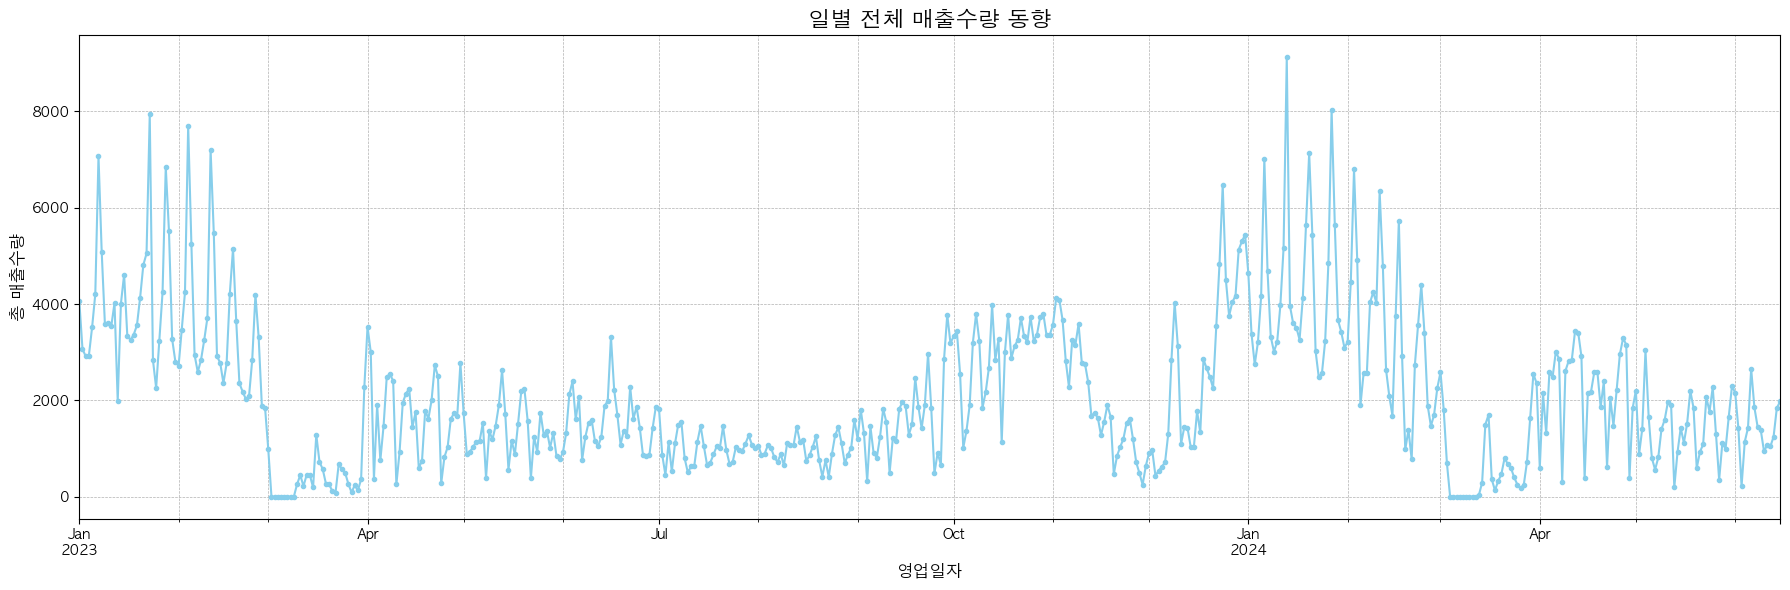

In [7]:
# 노트북 세션을 재시작했거나 train_df 변수가 없다면 이전 단계의 코드를 먼저 실행해주세요.
# 여기서는 train_df가 이전 단계에서 전처리된 상태로 메모리에 있다고 가정합니다.

# 1. 일자별로 '매출수량'을 합산하여 전체 매출 동향 파악
# groupby()를 사용해 '영업일자'별로 그룹화하고, 각 날짜의 '매출수량' 합계를 구합니다.
daily_sales = train_df.groupby('영업일자')['매출수량'].sum()

# 2. 시계열 그래프 생성
# 그래프 크기를 가로 18, 세로 6으로 설정하여 보기 좋게 만듭니다.
plt.figure(figsize=(18, 6))
daily_sales.plot(color='skyblue', marker='o', linestyle='-', markersize=3)

# 3. 그래프 제목 및 축 레이블 설정
plt.title('일별 전체 매출수량 동향', fontsize=16, fontweight='bold')
plt.xlabel('영업일자', fontsize=12)
plt.ylabel('총 매출수량', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout() # 그래프 요소들이 겹치지 않게 조정

# 4. 그래프 파일로 저장
plot_filename = 'total_sales_over_time.png'
plt.savefig(plot_filename)

print(f"'{plot_filename}' 파일로 전체 매출 동향 그래프가 저장되었습니다.")
print(f"데이터 기간: {daily_sales.index.min().date()} ~ {daily_sales.index.max().date()}")

'sales_by_day_of_week.png' 파일로 요일별 매출 그래프가 저장되었습니다.

--- 요일별 평균 매출수량 ---
월     7.759885
화     8.525770
수     8.064085
목     9.973275
금    12.255113
토    15.275702
일    12.717753
Name: 매출수량, dtype: float64


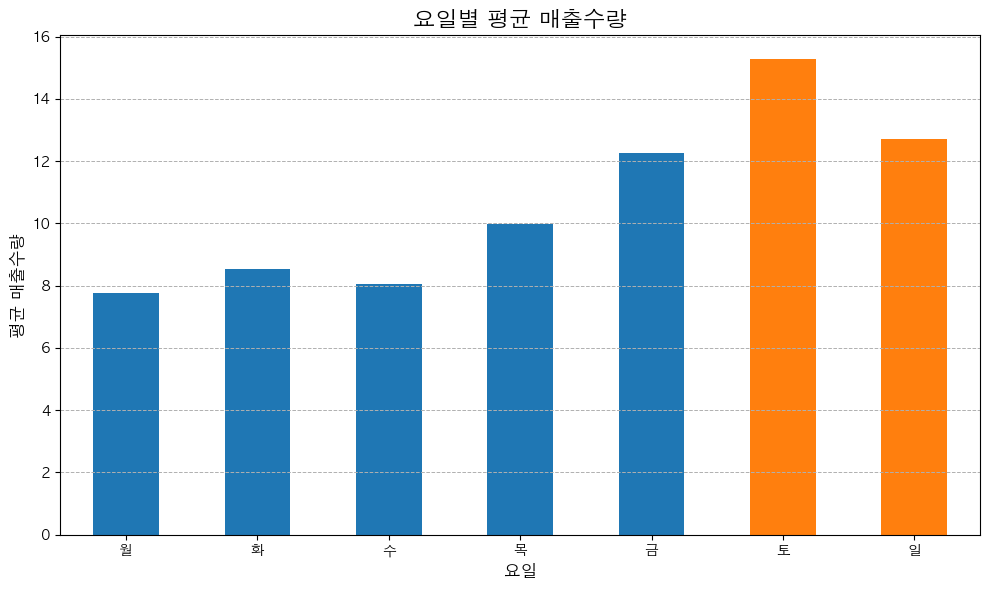

In [8]:
# train_df 변수가 없다면 이전 단계의 코드를 먼저 실행해주세요.

# 1. '요일' 컬럼 추가 (0=월요일, 1=화요일, ..., 6=일요일)
train_df['요일'] = train_df['영업일자'].dt.dayofweek

# 2. 요일별 평균 매출수량 계산
weekday_sales = train_df.groupby('요일')['매출수량'].mean().sort_index()

# 요일 이름을 한글로 매핑
weekday_sales.index = ['월', '화', '수', '목', '금', '토', '일']

# 3. 바(Bar) 그래프로 시각화
plt.figure(figsize=(10, 6))
# 주중(월-금)과 주말(토, 일)의 색상을 다르게 표시합니다.
colors = ['#1f77b4']*5 + ['#ff7f0e']*2 
weekday_sales.plot(kind='bar', color=colors) 

plt.title('요일별 평균 매출수량', fontsize=16, fontweight='bold')
plt.xlabel('요일', fontsize=12)
plt.ylabel('평균 매출수량', fontsize=12)
plt.xticks(rotation=0) # x축 라벨이 눕지 않도록 설정
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

# 4. 그래프 저장
plot_filename = 'sales_by_day_of_week.png'
plt.savefig(plot_filename)

print(f"'{plot_filename}' 파일로 요일별 매출 그래프가 저장되었습니다.")
print("\n--- 요일별 평균 매출수량 ---")
print(weekday_sales)

--- 영업장별 총 매출수량 순위 ---
영업장명
포레스트릿         305421
카페테리아         240850
화담숲주막         146311
담하            124917
미라시아           98071
느티나무 셀프BBQ     69786
화담숲카페          62634
연회장            28373
라그로타           17453
Name: 매출수량, dtype: int64

'sales_by_store_bar.png' 파일이 저장되었습니다.
'sales_by_store_line.png' 파일이 저장되었습니다.


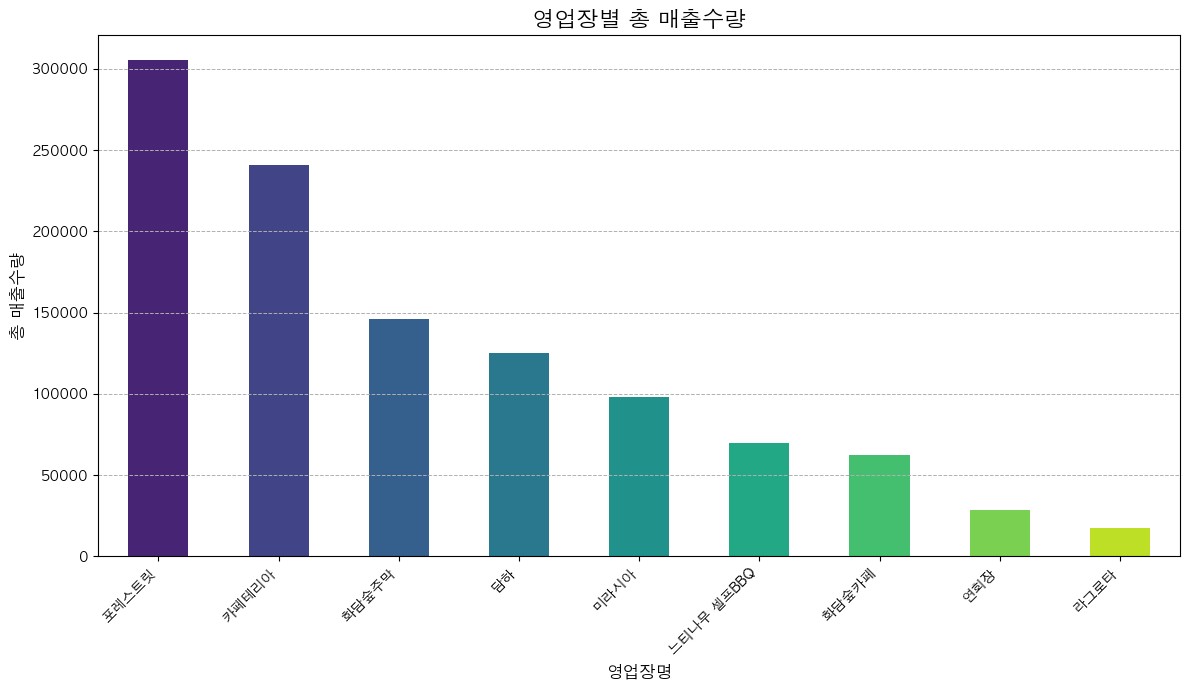

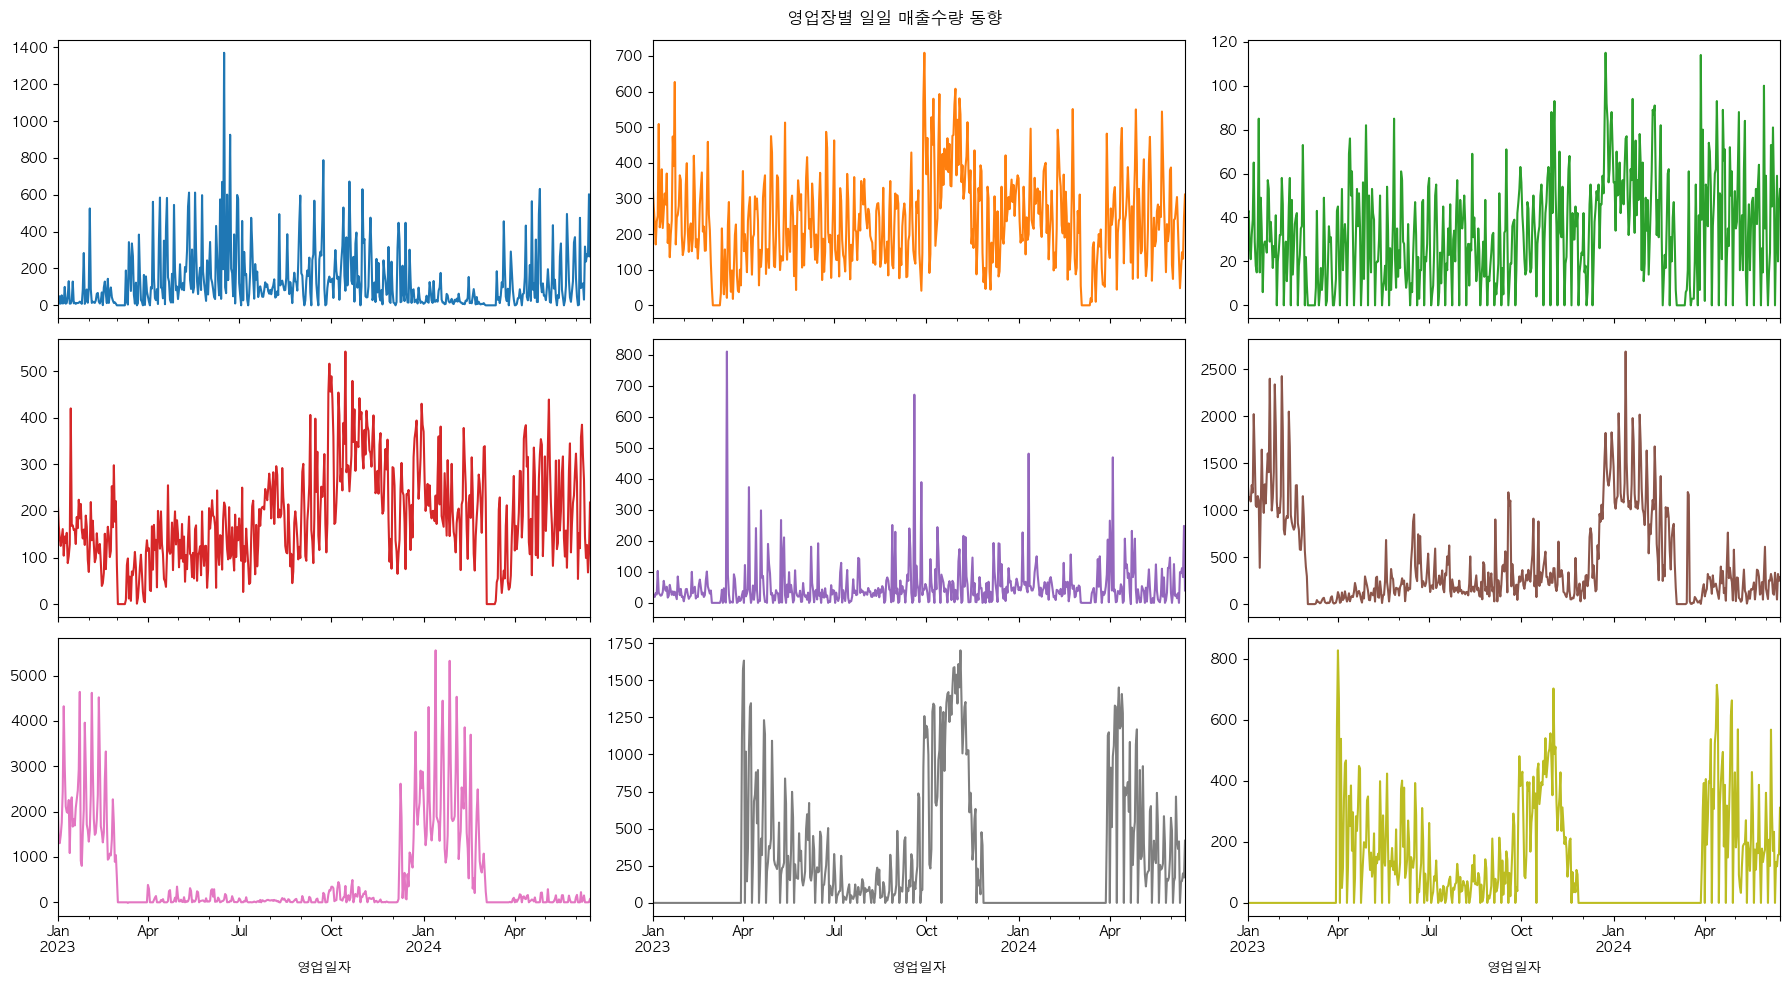

In [9]:
# train_df 변수가 없다면 이전 단계의 코드를 먼저 실행해주세요.

# 1. 영업장별 총 매출수량 계산 및 정렬
store_sales_sum = train_df.groupby('영업장명')['매출수량'].sum().sort_values(ascending=False)

# 2. (그래프 1) 영업장별 총 매출수량 막대 그래프
plt.figure(figsize=(12, 7))
# sns.color_palette를 사용하기 위해 seaborn 라이브러리를 임포트합니다.
import seaborn as sns
store_sales_sum.plot(kind='bar', color=sns.color_palette('viridis', len(store_sales_sum)))
plt.title('영업장별 총 매출수량', fontsize=16, fontweight='bold')
plt.xlabel('영업장명', fontsize=12)
plt.ylabel('총 매출수량', fontsize=12)
plt.xticks(rotation=45, ha='right') # x축 레이블을 45도 기울여 가독성 확보
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.savefig('sales_by_store_bar.png')
print("--- 영업장별 총 매출수량 순위 ---")
print(store_sales_sum)
print("\n'sales_by_store_bar.png' 파일이 저장되었습니다.")


# 3. (그래프 2) 영업장별 시계열 동향 선 그래프
# pivot_table을 사용하여 데이터를 [날짜] x [영업장] 형태로 변환
store_daily_sales = train_df.pivot_table(index='영업일자', columns='영업장명', values='매출수량', aggfunc='sum')

# 결측치(해당 날짜에 판매기록 없는 경우)는 0으로 채움
store_daily_sales = store_daily_sales.fillna(0)

# 그래프 생성
# subplots=True 옵션은 각 컬럼(영업장)마다 별도의 그래프를 그립니다.
store_daily_sales.plot(figsize=(18, 10), subplots=True, layout=(3, 3), 
                       title='영업장별 일일 매출수량 동향', legend=False)

plt.tight_layout()
plt.savefig('sales_by_store_line.png')
print("'sales_by_store_line.png' 파일이 저장되었습니다.")

--- 매출 Top-10 메뉴 ---
영업장명_메뉴명
포레스트릿_꼬치어묵            68733
화담숲주막_해물파전            60126
포레스트릿_떡볶이             56424
포레스트릿_생수              41445
포레스트릿_치즈 핫도그          30402
카페테리아_수제 등심 돈까스       27336
카페테리아_단체식 18000(신)    26571
화담숲카페_아메리카노 ICE       22525
포레스트릿_코카콜라            22035
포레스트릿_아메리카노(ICE)      21000
Name: 매출수량, dtype: int64

'images/top10_menu_sales.png' 파일이 저장되었습니다.

--- 매출 Bottom-10 메뉴 (매출 > 0) ---
영업장명_메뉴명
미라시아_잭 애플 토닉         170
연회장_Conference M1    164
연회장_Conference L3    162
연회장_Conference L2    158
연회장_OPUS 2           153
연회장_Conference M9    152
담하_문막 복분자 칵테일        138
라그로타_모둠 해산물 플래터      129
연회장_Conference M8    120
담하_명인안동소주            107
Name: 매출수량, dtype: int64

'images/bottom10_menu_sales.png' 파일이 저장되었습니다.

--- 총 193개 품목 중, 전체 기간 동안 매출이 0인 메뉴의 개수: 0개 ---


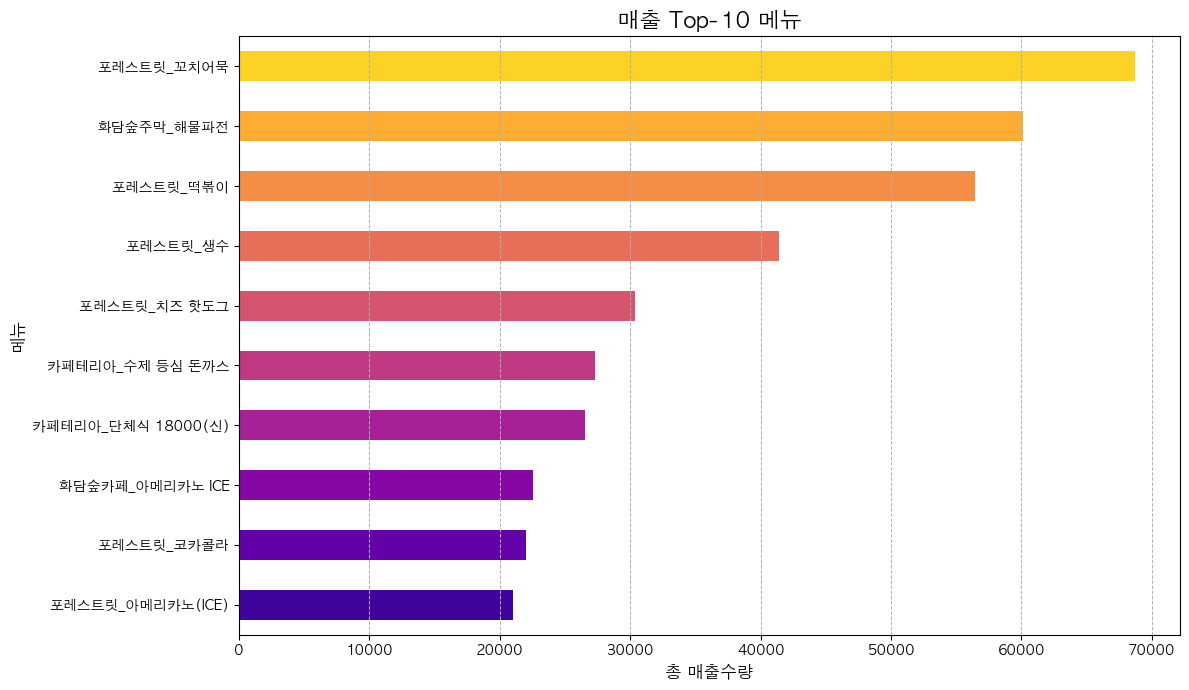

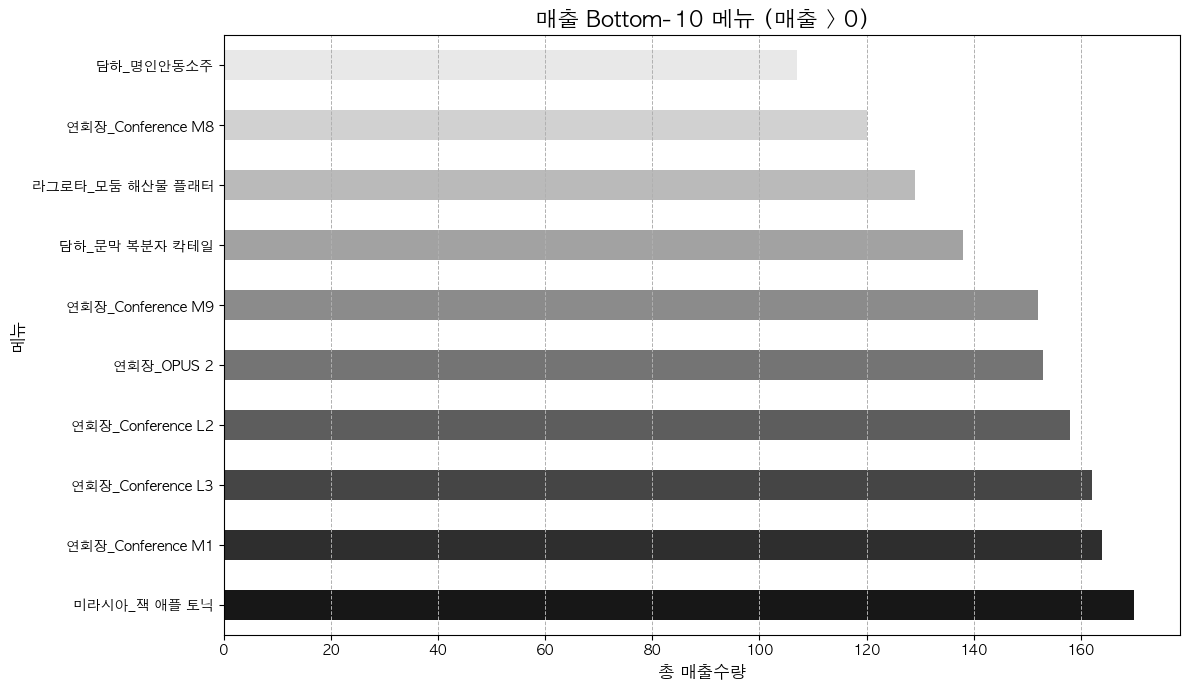

In [10]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# train_df 변수가 없다면 이전 단계의 코드를 먼저 실행해주세요.

# "images" 폴더 생성 (이미 존재하면 아무 일도 일어나지 않음)
os.makedirs('images', exist_ok=True)

# 1. 메뉴별(영업장명_메뉴명 기준) 총 매출수량 계산
menu_sales_sum = train_df.groupby('영업장명_메뉴명')['매출수량'].sum().sort_values(ascending=False)

# 2. Top-10 메뉴 추출 및 시각화
top10_menus = menu_sales_sum.head(10)

plt.figure(figsize=(12, 7))
top10_menus.sort_values(ascending=True).plot(kind='barh', color=sns.color_palette('plasma', 10))
plt.title('매출 Top-10 메뉴', fontsize=16, fontweight='bold')
plt.xlabel('총 매출수량', fontsize=12)
plt.ylabel('메뉴', fontsize=12)
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.savefig('images/top10_menu_sales.png')

print("--- 매출 Top-10 메뉴 ---")
print(top10_menus)
print("\n'images/top10_menu_sales.png' 파일이 저장되었습니다.")


# 3. Bottom-10 메뉴 추출 및 시각화
# 매출이 0인 메뉴들이 많을 수 있으므로, 0보다 큰 것들 중에서 가장 적게 팔린 것을 확인
bottom10_menus = menu_sales_sum[menu_sales_sum > 0].tail(10)

plt.figure(figsize=(12, 7))
bottom10_menus.sort_values(ascending=False).plot(kind='barh', color=sns.color_palette('gray', 10))
plt.title('매출 Bottom-10 메뉴 (매출 > 0)', fontsize=16, fontweight='bold')
plt.xlabel('총 매출수량', fontsize=12)
plt.ylabel('메뉴', fontsize=12)
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.savefig('images/bottom10_menu_sales.png')

print("\n--- 매출 Bottom-10 메뉴 (매출 > 0) ---")
print(bottom10_menus)
print("\n'images/bottom10_menu_sales.png' 파일이 저장되었습니다.")


# 4. 매출이 0인 메뉴 개수 확인
zero_sales_menus_count = (menu_sales_sum == 0).sum()
print(f"\n--- 총 193개 품목 중, 전체 기간 동안 매출이 0인 메뉴의 개수: {zero_sales_menus_count}개 ---")

In [2]:
import pandas as pd

# config.py를 import하여 경로를 사용합니다.
# 만약 eda.ipynb에서 config.py를 import할 때 오류가 발생하면, 
# 아래 경로를 직접 지정해주세요. e.g. path = './data/submission/sample_submission.csv'
import config 

# sample_submission.csv 파일 로드
try:
    submission_df = pd.read_csv(config.SUBMISSION_CSV_PATH)
    
    print("--- Sample Submission Shape ---")
    print(submission_df.shape)
    
    print("\n" + "--- Sample Submission Columns ---")
    print(submission_df.columns.tolist())
    
    print("\n" + "--- Sample Submission Head ---")
    print(submission_df.head())
    
    print("\n" + "--- Sample Submission Tail ---")
    print(submission_df.tail())
    
    print("\n" + "--- Sample Submission Info ---")
    submission_df.info()

except FileNotFoundError:
    print(f"파일을 찾을 수 없습니다: {config.SUBMISSION_CSV_PATH}")
except Exception as e:
    print(f"오류가 발생했습니다: {e}")

--- Sample Submission Shape ---
(70, 194)

--- Sample Submission Columns ---
['영업일자', '느티나무 셀프BBQ_1인 수저세트', '느티나무 셀프BBQ_BBQ55(단체)', '느티나무 셀프BBQ_대여료 30,000원', '느티나무 셀프BBQ_대여료 60,000원', '느티나무 셀프BBQ_대여료 90,000원', '느티나무 셀프BBQ_본삼겹 (단품,실내)', '느티나무 셀프BBQ_스프라이트 (단체)', '느티나무 셀프BBQ_신라면', '느티나무 셀프BBQ_쌈야채세트', '느티나무 셀프BBQ_쌈장', '느티나무 셀프BBQ_육개장 사발면', '느티나무 셀프BBQ_일회용 소주컵', '느티나무 셀프BBQ_일회용 종이컵', '느티나무 셀프BBQ_잔디그늘집 대여료 (12인석)', '느티나무 셀프BBQ_잔디그늘집 대여료 (6인석)', '느티나무 셀프BBQ_잔디그늘집 의자 추가', '느티나무 셀프BBQ_참이슬 (단체)', '느티나무 셀프BBQ_친환경 접시 14cm', '느티나무 셀프BBQ_친환경 접시 23cm', '느티나무 셀프BBQ_카스 병(단체)', '느티나무 셀프BBQ_콜라 (단체)', '느티나무 셀프BBQ_햇반', '느티나무 셀프BBQ_허브솔트', '담하_(단체) 공깃밥', '담하_(단체) 생목살 김치전골 2.0', '담하_(단체) 은이버섯 갈비탕', '담하_(단체) 한우 우거지 국밥', '담하_(단체) 황태해장국 3/27까지', '담하_(정식) 된장찌개', '담하_(정식) 물냉면 ', '담하_(정식) 비빔냉면', '담하_(후식) 된장찌개', '담하_(후식) 물냉면', '담하_(후식) 비빔냉면', '담하_갑오징어 비빔밥', '담하_갱시기', '담하_공깃밥', '담하_꼬막 비빔밥', '담하_느린마을 막걸리', '담하_담하 한우 불고기', '담하_담하 한우 불고기 정식', '담하_더덕 한우 지짐', '담하_들깨 양지탕', '담하_라면사리', '담하_룸 이용료', '담하_메밀면 사리', '담하_명인안동소주', '